<a href="https://colab.research.google.com/github/meetgandhi123/Machine-Learning-101/blob/master/Signs_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dataset

In [0]:
! unzip -q "signsv2.zip"

Reshaping all the images to 300*300 px

In [0]:
import os
import cv2

path = '/SIGNS'

files = []
for r, d, f in os.walk(path):
    for file in f:
        if '.jpg' in file:
            files.append(os.path.join(r, file))

for f in files:
    img=cv2.imread(f)
    img=cv2.resize(img,(300,300))
    cv2.imwrite(f, img)

Checking shape of a random image

In [3]:
img=cv2.imread("/SIGNS/test_signs/0/0_IMG_5943.jpg")
img.shape

(300, 300, 3)

In [0]:
import pandas as pd
import numpy as np

Converting image to np.ndarray.

In [0]:
def convert(img,d): 
  mydata=[]
  for z in img:
    for y in z:
      for x1 in y:
        mydata.append(x1)
  mydata.append(d)
  return mydata

In [0]:
d=[0,1,2,3,4,5]
train=np.empty([0,270001])
for i in d:
  path = '/SIGNS/train_signs/'+str(i)
  files = []
  for r, d, f in os.walk(path):
    for file in f:
      if '.jpg' in file:
        img=cv2.imread(path+'/'+file)
        img2=np.array(convert(img,i)).reshape(1,270001)
        train=np.append(train,img2,axis=0)


In [0]:
d=[0,1,2,3,4,5]
test=np.empty([0,270001])
for i in d:
  path = '/SIGNS/test_signs/'+str(i)
  files = []
  for r, d, f in os.walk(path):
    for file in f:
      if '.jpg' in file:
        img=cv2.imread(path+'/'+file)
        img2=np.array(convert(img,i)).reshape(1,270001)
        test=np.append(test,img2,axis=0)


In [0]:
d=[0,1,2,3,4,5]
dev=np.empty([0,270001])
for i in d:
  path = '/SIGNS/dev_signs/'+str(i)
  files = []
  for r, d, f in os.walk(path):
    for file in f:
      if '.jpg' in file:
        img=cv2.imread(path+'/'+file)
        img2=np.array(convert(img,i)).reshape(1,270001)
        dev=np.append(dev,img2,axis=0)


The images were of RGB and 300*300 px thus the array has shape (n , 300 * 300 * 3)

In [11]:
print(train.shape)
print(test.shape)
print(dev.shape)

(864, 270001)
(120, 270001)
(216, 270001)


Dividing training and testing data

In [0]:
y_train=train[:,-1]
x_train=np.delete(train,-1,axis=1)
y_test=test[:,-1]
x_test=np.delete(test,-1,axis=1)
y_dev=dev[:,-1]
x_dev=np.delete(dev,-1,axis=1)

Accuracy Function

In [0]:
def accuracy(y_pred,y_test,acc,s):
    from sklearn.metrics import accuracy_score,confusion_matrix, f1_score
    import seaborn as sns
    import matplotlib.pyplot as plt
    print("accuracy score:",accuracy_score(y_test, y_pred))
    acc[s]  = accuracy_score(y_test, y_pred)
    print("confusion matrix:\n",confusion_matrix(y_test, y_pred))
    print("f1 score:",f1_score(y_test, y_pred, average='macro'))
    # using heatmat to plot accuracy
    a=np.array(y_pred).reshape(-1,1)
    b=np.array(y_test).reshape(-1,1)
    df=pd.DataFrame(np.append(a,b,axis=1))
    df.columns=["predicted_vals","true_vals"]
    cor = df.corr()
    sns.heatmap(cor)
    #to use scatter plot uncomment the below given code
    #plt.scatter(y_test,y_pred)
    plt.show()

1) Using RandomForestClassifier from sklearn.ensemble to generate, fit the model and predict the output.

In [0]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'sqrt')
model.fit(x_train,y_train)
y_pred_randF= model.predict(x_test)
y_pred_randF=y_pred_randF.tolist()

2) Using Naive Bayes Classifier from sklearn.ensemble to generate, fit the model and predict the output


In [0]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_naiveBayes = gnb.fit(x_train, y_train).predict(x_test)

3) Using Support vector Machine from sklearn.ensemble to generate, fit the model and predict the output

In [0]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train, y_train)
y_pred_SVM=clf.predict(x_test)

4) Using Stochastic Gradient Descent from sklearn.ensemble to generate, fit the model and predict the output

In [17]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(x_train, y_train)
SGDClassifier(max_iter=5)
y_pred_SGD=clf.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


5) Using KNN from sklearn.ensemble to generate, fit the model and predict the output

In [0]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(x_train,y_train)
y_pred_KNN=neigh.predict(x_test)

Random Forest Accuracy
accuracy score: 0.9416666666666667
confusion matrix:
 [[20  0  0  0  0  0]
 [ 0 19  1  0  0  0]
 [ 0  0 19  0  1  0]
 [ 0  0  0 20  0  0]
 [ 2  0  1  1 16  0]
 [ 0  0  0  0  1 19]]
f1 score: 0.9409405314411733


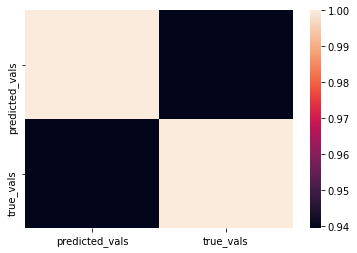


Naive Bayes Accuracy
accuracy score: 0.5916666666666667
confusion matrix:
 [[18  0  0  1  1  0]
 [ 0 16  1  1  2  0]
 [ 3  4 10  1  1  1]
 [ 0  1  2 12  4  1]
 [ 1  2  5  2  7  3]
 [ 2  0  6  2  2  8]]
f1 score: 0.5825874663083966


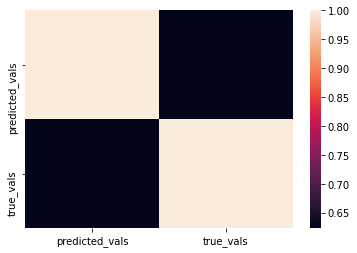


Support Vector Machine Accuracy
accuracy score: 0.925
confusion matrix:
 [[20  0  0  0  0  0]
 [ 0 18  1  1  0  0]
 [ 0  2 18  0  0  0]
 [ 0  0  1 19  0  0]
 [ 0  0  1  2 16  1]
 [ 0  0  0  0  0 20]]
f1 score: 0.9245515550393599


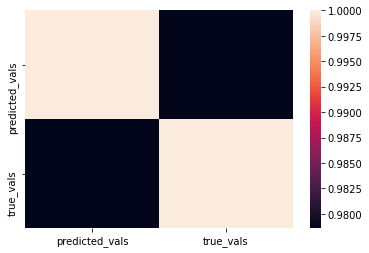


Stochastic Gradient Decent Accuracy
accuracy score: 0.5583333333333333
confusion matrix:
 [[11  1  0  1  0  7]
 [ 0 18  0  2  0  0]
 [ 0 10  0  0  1  9]
 [ 0  1  0 13  0  6]
 [ 0  2  0  4  6  8]
 [ 0  0  0  1  0 19]]
f1 score: 0.5052167558752583


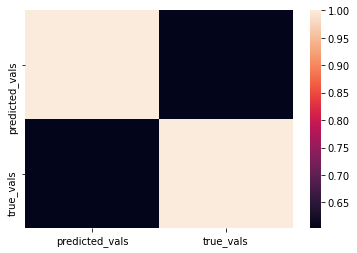


KNN Accuracy
accuracy score: 0.7416666666666667
confusion matrix:
 [[20  0  0  0  0  0]
 [ 0 20  0  0  0  0]
 [ 0  6 13  0  1  0]
 [ 1  1  4 14  0  0]
 [ 1  2  3  5  9  0]
 [ 0  1  1  3  2 13]]
f1 score: 0.7339287913983036


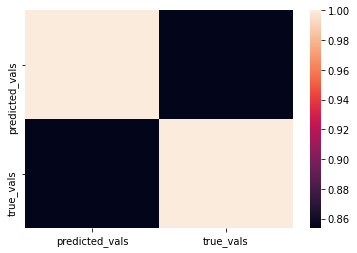

In [28]:
accuracy_matrix={"Random Forest":"","Naive Bayes":"","Support Vector Machine":"","Stochastic Gradient Decent":"","KNN":""}
print("Random Forest Accuracy")
method="Random Forest"
accuracy(y_pred_randF,y_test,accuracy_matrix,method)
print("\nNaive Bayes Accuracy")
method="Naive Bayes"
accuracy(y_pred_naiveBayes,y_test,accuracy_matrix,method)
print("\nSupport Vector Machine Accuracy")
method="Support Vector Mahcine"
accuracy(y_pred_SVM,y_test,accuracy_matrix,method)
print("\nStochastic Gradient Decent Accuracy")
method="Stochastic Gradient Decent"
accuracy(y_pred_SGD,y_test,accuracy_matrix,method)
print("\nKNN Accuracy")
method="KNN"
accuracy(y_pred_KNN,y_test,accuracy_matrix,method)

In [29]:
for i in accuracy_matrix:
    if accuracy_matrix[i] != "":
        print(i,accuracy_matrix[i])

Random Forest 0.9416666666666667
Naive Bayes 0.5916666666666667
Stochastic Gradient Decent 0.5583333333333333
KNN 0.7416666666666667
Support Vector Mahcine 0.925
